##### INF8250 – Reinforcement Learning - Fall 2024 - Final Project

# **Multi-Agent Reinforcement Learning**

### Members:

- Alexandre Fournier - 2147771

- Thomas Mousseau - 2149672


## Introduction

Multi-Agent Reinforcement Learning (MARL) extends the RL framework to environments where multiple agents interact, each potentially learning and adapting simultaneously. In MARL, agents may cooperate, compete, or both, adding complexity to the learning process. Understanding MARL is crucial for developing systems where multiple autonomous entities need to operate in shared environments, such as swarm robotics, autonomous driving, and distributed control systems.


## 1. From Single-Agent MDP to Multi-Agent Markov Game

### Markov Decision Process (MDP)

In the Markov decision process (MDP) formalization of reinforcement learning, a single adaptive agent interacts with an environment with the objective of maximizing the expected cumulative reward over time. The framework is defined as:

$$
\mathcal{M} = (\mathcal{S}, \mathcal{A}, \mathcal{P}, r, \gamma)
$$

$$
\begin{align}
\mathcal{S} &: \text{ States of the environment} \\
\mathcal{A} &: \text{ Actions set of the agent } \\
\mathcal{a} &: \text{ The action taken by the agent in state s } \\
\mathcal{P}(s' \mid s, a) &: \text{ Transition probability for reaching state } s' \text{ from } s \text{ after action } a \\
r(s, a) &: \text{ Reward for taking action } a \text{ in state } s \\
\gamma &: \text{ Discount factor, determining the importance of future rewards }
\end{align}
$$

The agent’s policy function $\pi(a \mid s)$ defines the probability of selecting action $(a)$ in state $(s)$, while the value function $V(s)$ represents the expected cumulative reward starting from $(s)$.

### Markov Game (MG)

In the Markov Game (MG) formalization of reinforcement learning, multiple adaptive agents interact within a shared environment. Each agent aims to maximize its expected cumulative reward, which may depend on the actions of other agents. It is defined as:

$$
\mathcal{M} = (\mathcal{N}, \mathcal{S}, \mathcal{A}, \mathcal{P}, \mathcal{R}, \gamma)
$$

$$
\begin{align}
\mathcal{N} &: \text{ Set of n agents } \\
\mathcal{S} &: \text{ States of the shared environment} \\
\mathcal{A} &: \text{ The action set, where each } A_i \text{ is the action set of agent } i \in N \\
a = (a_1, a_2, ..., a_n) &: \text{ The joint action taken by all agents in state } s \\
P(s' \mid s, a) &: \text{ The transition probability function, returning the probability of transitioning to state } s' \\
&\quad \text{ given state } s \text{ and joint actions } A_t \\
R_i(s, a) &: \text{ The reward function of agent } i, \text{ mapping states and joint actions to rewards } \\
R &: \text{ The set of reward functions } R = \{R_1, \dots, R_N\}. \\
\gamma &: \text{ Discount factor, determining the importance of future rewards }
\end{align}
$$

The policy function for agent \(i\) is extended to a joint policy function for all agents, defined as:

$$
\boldsymbol{\pi}(\mathbf{a} \mid s) = \prod_{i=1}^N \pi_i(a_i \mid s),
$$

The value function for agent \(i\) is similarly extended to incorporate the joint policy and joint actions, defined as:

$$
V_i(s) = \mathbb{E}_{\boldsymbol{\pi}} \left[ \sum_{t=0}^\infty \gamma^t \mathcal{R}_i(s_t, \mathbf{a}_t) \mid s_0 = s \right].
$$

In the case of zero-sum games, the value function satisfies:

$$
V_1(s) = -V_2(s),
$$

indicating that the gain of one agent is the loss of the other. In cooperative settings, the value function may represent a shared cumulative reward:

$$
V(s) = \sum_{i=1}^N V_i(s),
$$

capturing the collective outcome of all agents acting together.



## 2. Different type of settings


### Fully cooperative (explain in depth cooperative)

### Fully competitive (zero sum game)


### Mixed cooperative and competitive

### Code

In [ ]:
!pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.0/552.0 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.1/251.1 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of shimmy to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of shimmy[openspiel] to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.6/191.6 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 847.8/847.8 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50

In [ ]:
import os

import imageio
import numpy as np
import torch
from agilerl.algorithms.dqn import DQN
from agilerl_dqn_curriculum import Opponent
from PIL import Image, ImageDraw, ImageFont

from pettingzoo.classic import connect_four_v3


# Define function to return image
def _label_with_episode_number(frame, episode_num, frame_no, p):
    im = Image.fromarray(frame)
    drawer = ImageDraw.Draw(im)
    text_color = (255, 255, 255)
    font = ImageFont.truetype("arial.ttf", size=45)
    drawer.text(
        (100, 5),
        f"Episode: {episode_num+1}     Frame: {frame_no}",
        fill=text_color,
        font=font,
    )
    if p == 1:
        player = "Player 1"
        color = (255, 0, 0)
    if p == 2:
        player = "Player 2"
        color = (100, 255, 150)
    if p is None:
        player = "Self-play"
        color = (255, 255, 255)
    drawer.text((600, 5), f"Agent", fill=color, font=font)
    return im


# Resizes frames to make file size smaller
def resize_frames(frames, fraction):
    resized_frames = []
    for img in frames:
        new_width = int(img.width * fraction)
        new_height = int(img.height * fraction)
        img_resized = img.resize((new_width, new_height))
        resized_frames.append(np.array(img_resized))

    return resized_frames


if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    path1 = "./lesson4_trained_agent.pt"
    path2 = "./lesson1_trained_agent.pt"

    env = connect_four_v3.env(render_mode="rgb_array")
    env.reset()

    # Configure the algo input arguments
    state_dim = [
        env.observation_space(agent)["observation"].shape for agent in env.agents
    ]
    one_hot = False
    action_dim = [env.action_space(agent).n for agent in env.agents]

    # Pre-process dimensions for pytorch layers
    # We will use self-play, so we only need to worry about the state dim of a single agent
    # We flatten the 6x7x2 observation as input to the agent's neural network
    state_dim = np.zeros(state_dim[0]).flatten().shape
    action_dim = action_dim[0]

    # Instantiate an DQN object
    dqn1 = DQN(
        state_dim,
        action_dim,
        one_hot,
        device=device,
    )

    dqn2 = DQN(
        state_dim,
        action_dim,
        one_hot,
        device=device,
    )

    # Load the saved algorithm into the DQN object
    dqn1.loadCheckpoint(path1)
    dqn2.loadCheckpoint(path2)

    # Define test loop parameters
    episodes = 100  # Number of episodes to test agent on
    max_steps = (
        500  # Max number of steps to take in the environment in each episode
    )

    rewards = []  # List to collect total episodic reward
    frames = []  # List to collect frames

    print("============================================")
    print(f"Agent: {path1}")
    print(f"Opponent: {path2}")

    # Test loop for inference
    episode_scores = []

    for ep in range(episodes):
        if ep / episodes < 0.5:
            opponent_first = False
            p = 1
        else:
            opponent_first = True
            p = 2
        env.reset()  # Reset environment at start of episode
        frame = env.render()
        frames.append(
            _label_with_episode_number(frame, episode_num=ep, frame_no=0, p=p)
        )
        observation, reward, done, truncation, _ = env.last()
        player = -1  # Tracker for which player's turn it is
        score = 0
        for idx_step in range(max_steps):
            action_mask = observation["action_mask"]
            if player < 0:
                state = np.moveaxis(observation["observation"], [-1], [-3])
                state = np.expand_dims(state, 0)
                if opponent_first:
                    action = dqn2.getAction(
                        state, epsilon=0.05, action_mask=action_mask
                    )[
                        0
                    ]  # Get next action from agent
                else:
                    action = dqn1.getAction(
                        state, epsilon=0.05, action_mask=action_mask
                    )[
                        0
                    ]  # Get next action from agent
            if player > 0:
                state = np.moveaxis(observation["observation"], [-1], [-3])
                state[[0, 1], :, :] = state[[0, 1], :, :]
                state = np.expand_dims(state, 0)
                if not opponent_first:
                    action = dqn2.getAction(
                                state, epsilon=0.05, action_mask=action_mask
                            )[0]
                else:
                    action = dqn1.getAction(
                        state, epsilon=0.05, action_mask=action_mask
                    )[
                        0
                    ]  # Get next action from agent
            env.step(action)  # Act in environment
            observation, reward, termination, truncation, _ = env.last()
            # Save the frame for this step and append to frames list
            frame = env.render()
            frames.append(
                _label_with_episode_number(
                    frame, episode_num=ep, frame_no=idx_step, p=p
                )
            )

            if (player > 0 and opponent_first) or (
                player < 0 and not opponent_first
            ):
                score += reward
            else:
                score -= reward

            # Stop episode if any agents have terminated
            if truncation or termination:
                break

            player *= -1

        print("-" * 15, f"Episode: {ep+1}", "-" * 15)
        print(f"Episode length: {idx_step}")
        print(f"Score: {score}")
        episode_scores.append(score)
    print("============================================")

    frames = resize_frames(frames, 0.5)

    # Save the gif to specified path
    gif_path = "./videos/"
    os.makedirs(gif_path, exist_ok=True)
    # imageio.mimwrite(
    #     os.path.join("./videos/", f"connect_four_custom_opp.gif"),
    #     frames,
    #     duration=400,
    #     loop=True,
    # )

    env.close()

Agent: ./lesson4_trained_agent.pt
Opponent: ./lesson1_trained_agent.pt
--------------- Episode: 1 ---------------
Episode length: 12
Score: -1
--------------- Episode: 2 ---------------
Episode length: 12
Score: -1
--------------- Episode: 3 ---------------
Episode length: 12
Score: -1
--------------- Episode: 4 ---------------
Episode length: 14
Score: -1
--------------- Episode: 5 ---------------
Episode length: 12
Score: -1
--------------- Episode: 6 ---------------
Episode length: 12
Score: -1
--------------- Episode: 7 ---------------
Episode length: 21
Score: 1
--------------- Episode: 8 ---------------
Episode length: 10
Score: -1
--------------- Episode: 9 ---------------
Episode length: 19
Score: 1
--------------- Episode: 10 ---------------
Episode length: 12
Score: -1
--------------- Episode: 11 ---------------
Episode length: 12
Score: -1
--------------- Episode: 12 ---------------
Episode length: 12
Score: -1
--------------- Episode: 13 ---------------
Episode length: 13
S

In [ ]:
count_minus_one = episode_scores.count(-1)

total_count = len(episode_scores)

print(f"Win Rate: {count_minus_one / total_count:.2%}")

Win Rate: 82.00%


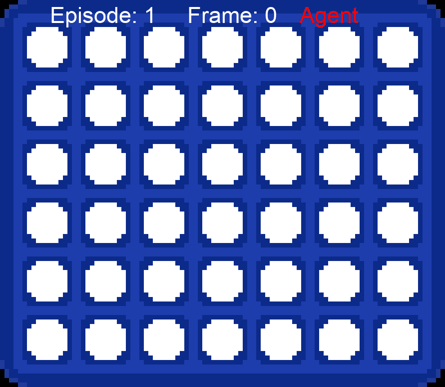

In [ ]:
from IPython.display import Image
Image('./videos/connect_four_custom_opp.gif')

## 3. Challenges in multi-agent reinforcement learning

### Non-stationarity

In an environment with multiple agents, each agent is simultaneously learning and adapting its own policy. This creates a dynamic, ever-changing environment that acts as a moving target for the other agents. From the perspective of any single agent, the environment becomes non-stationary, disrupting the foundational Markov assumption typically relied upon in traditional reinforcement learning (RL).

The changing environment faced by the 𝑖 i-th agent can be expressed as follows:

$$
P(s' \mid s, \mathbf{a}, \pi_1, \pi_2, \pi_3, ..., \pi_n) ≠ P(s' \mid s, \mathbf{a}, \pi_1', \pi_2', \pi_3', ..., \pi_n')
$$
due to the fact that: $$\pi_i ≠ \pi_i'$$

Given this, the assumption of Markov games, which relies on stationary dynamics, doesn't hold.

However, several techniques have been developed to address the challenge of non-stationarity in multi-agent reinforcement learning (MARL). These include the experience replay mechanism, which stabilizes learning by reusing past experiences; the use of centralized critics, which enhance individual agents' capabilities by leveraging joint information; and meta-learning, which constructs predictive models of other agents' actions. These approaches significantly improve the robustness of MARL systems in non-stationary environments.



### Partial observability

In multi-agent reinforcement learning (MARL), the partial observability refers to the fact that each agent have access to a limited amount of information about the environment. Each agent perceives only its local observations and lack a full understanding of the environment's global state. The agents cannot predict or observe the behavior of others  which make coordinating actions among agents particularly challenging, especially in cooperative settings.

The paradigm of Centralized Training and Decentralized Execution (CTDE) address this problem by incorporating a centralized critic during the training phase.

$$Q_{\text{centralized}}(s, \mathbf{a}; \theta) \approx \mathbb{E}_{\boldsymbol{\pi}} \left[ G_t \mid s_0 = s, \mathbf{a}_0 = \mathbf{a} \right]$$

This critic has access to a global state of the environment and the actions of all agents which removes the limitation of partial observability. By leveraging this global information, the critic provides more accurate value estimates, enabling agents to learn better policies during training.

The right schema illustrates a Naive MARL approach while the left schema illustrates a CTDE approach.

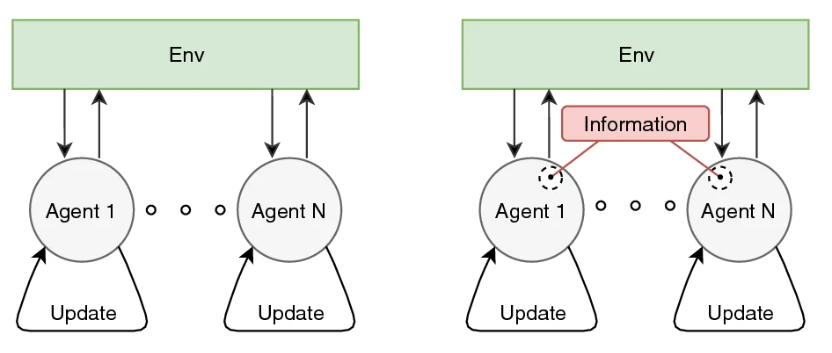

### Credit assignment

In traditional reinforcement learning (RL), credit assignment refers to identifying past actions that contributed to rewards, known as temporal credit assignment. In multi-agent RL (MARL), an additional challenge arises: determining whose actions among multiple agents led to the rewards, referred to as multi-agent credit assignment.

This problem is particularly prominent in common-reward settings, where rewards are shared indiscriminately among agents. As a result, even non-contributing or "lazy" agents may receive rewards, creating misleading reinforcement. However, the challenge persists even with individual rewards, as agents must still discern whose actions caused the reward.

When multi-agent credit assignment is combined with temporal credit assignment, the problem becomes even more complex: agents must identify which agent's action at which time step contributed to the reward.

**Solutions**

The training loop is structured as follows:

1. **Joint-Action Value Functions**:  
   Centralized Q-learning models ascribe values to joint actions, disentangling the contributions of individual agents.

2. **Value Decomposition**:  
   These methods break down the collective value function into individual contributions, providing clearer attribution.

These approaches help agents properly attribute rewards, addressing the challenges of multi-agent credit assignment effectively.

This concept can be illustrated by a cooperative foraging task in which a group of three robots, or
agents, must collect all items. In the shown situation, assume that all three agents attempt
the “collect” action, and that as a result they all receive a reward of +1. Whose
actions led to this reward?

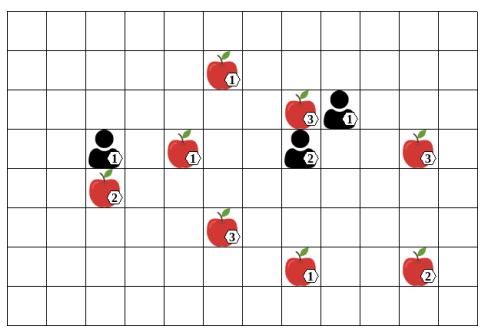

### Scalability


A fundamental challenge in multi-agent settings is scaling a system to accommodate many agents. This challenge arises because the number of joint actions grows exponentially with the number of agents. 

$$\mathcal{A} = \mathcal{A}_1 \times \mathcal{A}_2 \times \dots \times \mathcal{A}_n$$

Additionally, if agents have associated features, the size of the state space also increases exponentially with the number of agents. IF we consider each agent position for example, it will affects the size of the state space.

Algorithms like central Q-learning, which we previously discussed as a solution to credit assignment, suffer from this exponential growth in the action space. Furthermore, adding more agents increases the degree of non-stationarity, as each additional agent introduces new dynamics that others must adapt to.

As we can see, scaling the number of agents exacerbates the challenges we discussed earlier. One approach to improving the scalability of MARL algorithms is to leverage deep learning techniques, particularly through the use of value function approximation (VFA). VFA enables MARL algorithms to handle large action and state spaces more efficiently by approximating the value functions instead of explicitly storing them.

# AlphaStar: Achieving Grandmaster Level in StarCraft II

In 2019, Google DeepMind took on yet another ambitious challenge in the realm of video games: conceiving an agent capable of competing with the best players in the world. Following their groundbreaking success with AlphaGo, their next target became StarCraft II, a highly complex and strategic real-time strategy game.

## Background

Among the many innovations, network architectures, and techniques used, some novel ideas regarding multi-agent reinforcement learning (MARL) emerged, proving instrumental to AlphaStar's success. Before diving into these concepts, it’s important to first understand the problem that necessitated such solutions.

A StarCraft II match between two players represents a competitive setting, where the efficacy of self-play had already been demonstrated in prior research. Self-play, however, fosters a cyclic nature of learning: strategies may improve temporarily but are prone to falling into pseudo-improvement loops, akin to endlessly iterating between the game of rock-paper-scissors. To counter this limitation, DeepMind introduced exploiters, dedicated agents trained to identify weaknesses in the strongest models and expose vulnerabilities.

## Training Loop and Role of Exploiters

The training loop is structured as follows:

1. **Main Agents**:  
   These agents are trained to improve against all past players, snapshotted versions of agents saved at various points during training. This ensures that progress builds upon prior strategies and knowledge.

2. **League Exploiters**:  
   These agents train specifically against all past players to uncover systemic weaknesses within the entire league. Their role is to push the league to address strategies that might not be robust when generalized.

3. **Main Exploiters**:  
   Unlike league exploiters, main exploiters train solely against the current main agents to identify specific exploits in their strategies. This forces the main agents to adapt and eliminate weaknesses.

To maintain diversity and prevent stagnation, both main exploiters and league exploiters are periodically reinitialized. This reset allows for exploration of new strategies and ensures that exploiters don’t overfit to particular weaknesses.

## Prioritized Fictitious Self-Play (PFSP)

A core component of this framework is prioritized fictitious self-play (PFSP). Rather than uniformly sampling opponents (as in traditional self-play), PFSP uses a weighted mixture of opponents, prioritizing those against which the agent struggles most. This ensures the main agents continuously learn to overcome their toughest adversaries while still retaining lessons learned from past strategies.

The periodic snapshots of agents into the league, combined with the PFSP mechanism, drive steady progress. By emphasizing challenging opponents and integrating exploiters into the training pool, DeepMind ensured that AlphaStar avoided stagnation and achieved a high level of robustness.

## Empirical Results

The success of these innovations is reflected in the empirical results, consult the graphs a to d provided by Google DeepMind's paper:
- Without the addition of exploiters into the training process, the main agents failed to reach high Elo scores.  
- The inclusion of exploiters, coupled with PFSP, enabled AlphaStar to achieve a rating of 1600 Elo and beyond.  
- Ablation studies, such as graph d, demonstrated that combining self-play with prioritized fictitious self-play yielded the best results, outperforming alternative methods.

## Conclusion

DeepMind’s AlphaStar introduced groundbreaking concepts in multi-agent reinforcement learning, particularly through the innovative use of league training, exploiters, and prioritized fictitious self-play. By maintaining a dynamic league of diverse opponents and continuously addressing strategic weaknesses, AlphaStar achieved a robust and adaptive learning process.

These contributions not only allowed AlphaStar to reach Grandmaster level in StarCraft II but also showcased the potential of MARL to solve real-world, complex problems requiring strategic and adaptive decision-making.

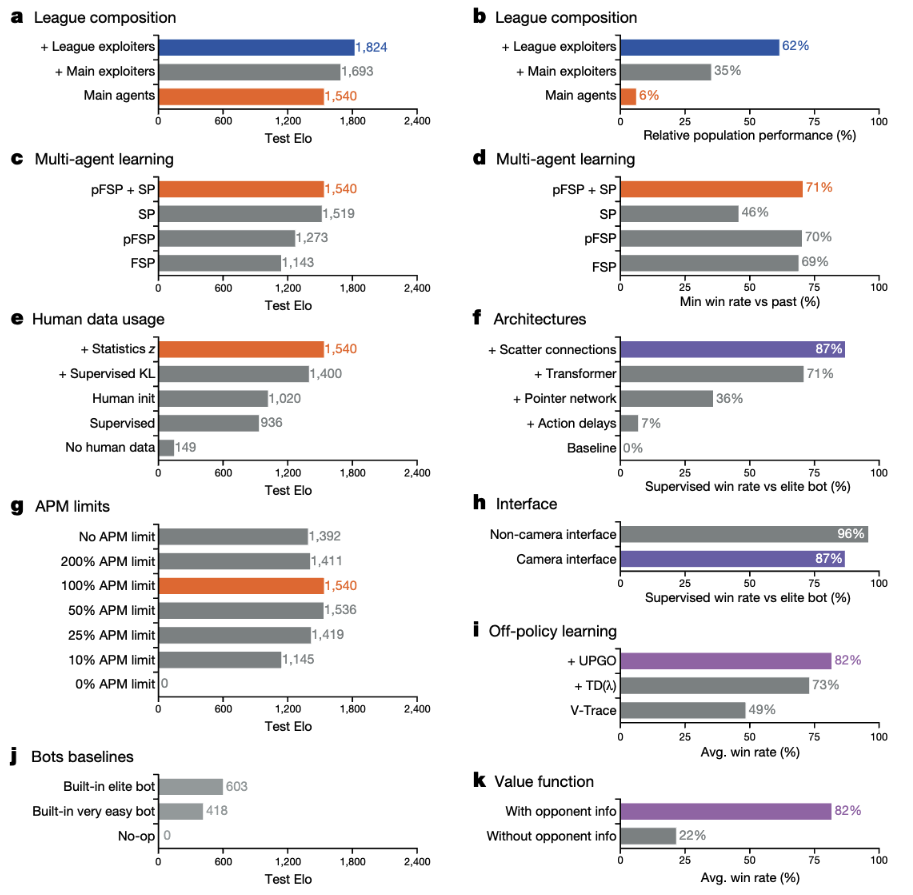

# OpenAI Five (Dota 2)

In 2019, the company OpenAI embarked on a similar journey as Google DeepMind, creating a superhuman agent capable of beating the best players in a specific game, which in this case was Dota 2. The grand idea behind this type of project is to use a low-cost, low-stakes environment as a sandbox to develop tricks and techniques that could later be applied to more impactful projects, such as solving real-world problems like drug discovery, material design, and many more.

## Demonstration of OpenAI Five

To display their new model, OpenAI hosted a best-of-3 series against the best team in the world. Having been beaten in 2 games, the professional team praised the artificial intelligence and OpenAI for their work but explained that the most surprising part of the system was its impeccable way of cooperating between all agents in a teamfight situation.

Therefore, after seeing such a comment, I was expecting to read about some novel approach to centralized training and decentralized execution that would have maximized their cohesion during training, which in turn would explain their perfect cooperation on the battlefield. But to my surprise, the paper explains that all cohesion between the 5 agents was born through self-play.

## How Can Self-Play Be So Effective in a Mixed Cooperative and Competitive Setting?

There are a few aspects that made this possible.

### Shared Reward Signal

Firstly, during training and execution, all 5 agents had the same reward signal, which was to maximize the probability of winning as a team. This shared reward naturally incentivized cooperation and teamwork. Thus, to stay competitive, they had to evolve cooperative behaviors such as:
- Grouping for fights  
- Defending teammates  
- Sharing map control  

These behaviors emerged as a direct result of optimizing for the shared team reward.

### A Shared Neural Network for All Agents

Secondly, OpenAI Five used one neural network with identical parameters for all 5 agents. This shared network played a significant role in developing coordinated strategies:
- **Same Policy, Different Observations**:  
   Each hero was controlled by a replica of the same neural network. This enabled agents to learn cooperative behaviors and team-level strategies implicitly, without explicit communication between them.  
- **Consistent Decision-Making**:  
   Because they used the same neural network, all heroes learned a common policy during training. This created a consistent foundation for the decision-making process across the team.

### Long-Term Memory with LSTM

A significant part of the cooperative strategy was implemented using the **LSTM network**. This network:
- Maintained a **hidden state** based on its observations for each hero independently.  
- Allowed the network to "remember" past events and make decisions based on **long-term context**.  

This ability to retain information over time was critical for planning and executing team-level strategies, such as initiating fights or retreating together.

### Emergent Team-Level Strategies Through Self-Play

Finally, through self-play using a single common neural network, the agents implicitly learned to:
- Prioritize actions that benefited the entire team  
- Cooperate effectively without explicitly sharing information or hardcoding behaviors  

By optimizing for the team’s success through self-play, the network discovered team-level strategies that emerged organically. These strategies included coordinated attacks, defending teammates, and managing resources effectively.

## Conclusion

OpenAI Five’s impeccable teamwork and coordination were not pre-programmed but emerged naturally through self-play. By using a shared reward signal, a single neural network, and an LSTM for long-term memory, the agents learned to cooperate effectively in a mixed cooperative and competitive setting. This achievement highlights the power of reinforcement learning to solve complex multi-agent problems without the need for explicit communication.

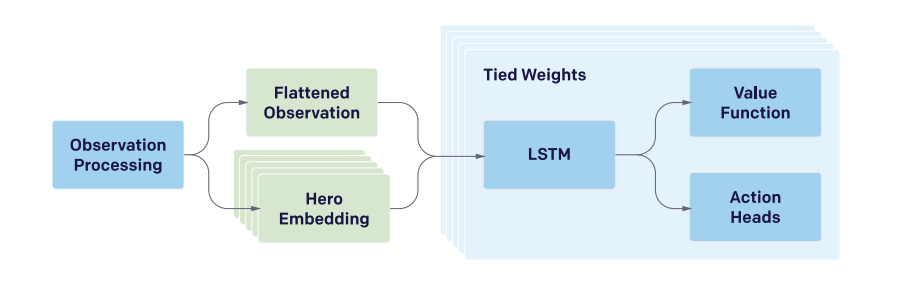